In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as vale
import seaborn as sns
from sklearn import linear_model

In [12]:
datos_filtro=pd.read_csv("Historical Product Demand.csv", parse_dates=["Date"])
datos_filtro= datos_filtro.dropna(axis=0)

In [6]:
datos_filtro

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50


In [13]:
datos_filtro=datos_filtro[(datos_filtro["Date"]>="2012-01-01 00:00:00")&(datos_filtro["Date"]<="2016-12-31 00:00:00")]
datos_filtro["año"]=pd.DatetimeIndex(datos_filtro["Date"]).year
datos_filtro["Order_Demand"]=datos_filtro["Order_Demand"].str.replace("(","")
datos_filtro["Order_Demand"]=datos_filtro["Order_Demand"].str.replace(")","")
datos_filtro["Order_Demand"]=datos_filtro["Order_Demand"].astype("int64")
print(datos_filtro)

         Product_Code Warehouse Product_Category       Date  Order_Demand  \
0        Product_0993    Whse_J     Category_028 2012-07-27           100   
1        Product_0979    Whse_J     Category_028 2012-01-19           500   
2        Product_0979    Whse_J     Category_028 2012-02-03           500   
3        Product_0979    Whse_J     Category_028 2012-02-09           500   
4        Product_0979    Whse_J     Category_028 2012-03-02           500   
...               ...       ...              ...        ...           ...   
1048570  Product_1791    Whse_J     Category_006 2016-04-27          1000   
1048571  Product_1974    Whse_J     Category_006 2016-04-27             1   
1048572  Product_1787    Whse_J     Category_006 2016-04-28          2500   
1048573  Product_0901    Whse_J     Category_023 2016-10-07            50   
1048574  Product_0704    Whse_J     Category_001 2016-06-27             4   

          año  
0        2012  
1        2012  
2        2012  
3        20

In [7]:
datos_agrupado=datos_filtro.iloc[:,[2,4,5]]
datos_agrupado= datos_agrupado.groupby(["Product_Category","año"]).sum()
datos_agrupado=datos_agrupado.reset_index()
print(datos_agrupado)
print(datos_filtro["Order_Demand"].max())
print(datos_filtro["Order_Demand"].min())

    Product_Category   año  Order_Demand
0       Category_001  2012        275607
1       Category_001  2013        320250
2       Category_001  2014        369620
3       Category_001  2015        389403
4       Category_001  2016        401567
..               ...   ...           ...
150     Category_033  2012       9080000
151     Category_033  2013       7680000
152     Category_033  2014       8240000
153     Category_033  2015       8260000
154     Category_033  2016       9350000

[155 rows x 3 columns]
4000000
0


In [8]:
categorias=datos_agrupado["Product_Category"].unique()
print(categorias)

['Category_001' 'Category_002' 'Category_003' 'Category_004'
 'Category_005' 'Category_006' 'Category_007' 'Category_008'
 'Category_009' 'Category_010' 'Category_011' 'Category_012'
 'Category_013' 'Category_014' 'Category_015' 'Category_016'
 'Category_017' 'Category_018' 'Category_019' 'Category_020'
 'Category_021' 'Category_022' 'Category_023' 'Category_024'
 'Category_025' 'Category_026' 'Category_027' 'Category_028'
 'Category_029' 'Category_030' 'Category_031' 'Category_032'
 'Category_033']


In [9]:
años_completo=[]
for categoria in categorias:
    datos_categoria=datos_agrupado[datos_agrupado["Product_Category"]== categoria]
    #print(datos_categoria)
    if datos_categoria.shape[0]== 5:
        años_completo.append(categoria)
        
print(años_completo)
    

['Category_001', 'Category_003', 'Category_005', 'Category_006', 'Category_007', 'Category_008', 'Category_009', 'Category_010', 'Category_011', 'Category_012', 'Category_013', 'Category_015', 'Category_017', 'Category_018', 'Category_019', 'Category_020', 'Category_021', 'Category_022', 'Category_023', 'Category_024', 'Category_026', 'Category_028', 'Category_029', 'Category_030', 'Category_031', 'Category_032', 'Category_033']


In [10]:
datos_limpios= datos_filtro[datos_filtro["Product_Category"].isin(años_completo)]
print(datos_limpios)

         Product_Code Warehouse Product_Category       Date  Order_Demand  \
0        Product_0993    Whse_J     Category_028 2012-07-27           100   
1        Product_0979    Whse_J     Category_028 2012-01-19           500   
2        Product_0979    Whse_J     Category_028 2012-02-03           500   
3        Product_0979    Whse_J     Category_028 2012-02-09           500   
4        Product_0979    Whse_J     Category_028 2012-03-02           500   
...               ...       ...              ...        ...           ...   
1048570  Product_1791    Whse_J     Category_006 2016-04-27          1000   
1048571  Product_1974    Whse_J     Category_006 2016-04-27             1   
1048572  Product_1787    Whse_J     Category_006 2016-04-28          2500   
1048573  Product_0901    Whse_J     Category_023 2016-10-07            50   
1048574  Product_0704    Whse_J     Category_001 2016-06-27             4   

          año  
0        2012  
1        2012  
2        2012  
3        20

## problema 1

¿Cuántas bodegas maneja la empresa? ¿Cuál es la bodega que provee la mayor parte de la venta?
Representa esta información de manera gráfica con un diagrama de Pareto.

In [11]:
datos_limpios.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

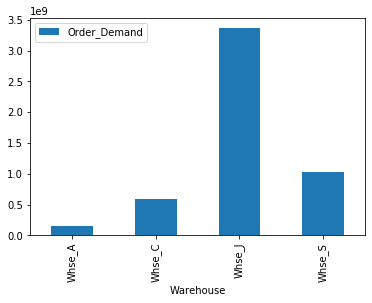

           Order_Demand
Warehouse              
Whse_A        147646299
Whse_C        582004179
Whse_J       3362742530
Whse_S       1032522115


In [12]:
bodegas= datos_limpios.iloc[:,[1,4]]
bodegas= bodegas.groupby("Warehouse").sum()
bodegas.plot.bar()
plt.show()
print(bodegas)

## problema 2

¿Cuántos productos generaron el 80% de la venta durante todo el periodo de estudio? De igual manera, utiliza un diagrama de Pareto para representar esta información.
Obtén una tabla que indique qué tanto vendió cada uno de estos productos por cada año. En este caso, que cada renglón represente un producto, y cada columna un año.

In [13]:
productos_clave=datos_limpios.iloc[:,[0,4]]
#productos_año=datos_limpios.iloc[:,[0,5]]
productos_clave=productos_clave.groupby("Product_Code").sum()
#productos_año=productos_año.groupby("año").sum()

#print(productos_año)
total=productos_clave["Order_Demand"].sum()
productos_clave["%"]= productos_clave["Order_Demand"]/total
productos_clave=productos_clave.sort_values(by="%",ascending=False)
productos_clave["Acum"]= productos_clave["%"].cumsum()
productos_clave2=productos_clave
#print(total)


In [14]:
productos_clave=productos_clave[productos_clave["Acum"]<=.8]
#print(productos_clave)
productos_año=datos_limpios.iloc[:,[0,4,5]]
productos_año=productos_año[productos_año["Product_Code"].isin(productos_clave.index)]
productos_año=productos_año.groupby(["Product_Code","año"]).sum().reset_index()
print(productos_año)


     Product_Code   año  Order_Demand
0    Product_0033  2012       7168500
1    Product_0033  2013       7921000
2    Product_0033  2014       9448500
3    Product_0033  2015      10078500
4    Product_0033  2016       8929500
..            ...   ...           ...
420  Product_1970  2012       3260000
421  Product_1970  2013       3788000
422  Product_1970  2014       4979000
423  Product_1970  2015       3540000
424  Product_1970  2016       3467000

[425 rows x 3 columns]


In [15]:
producto_vendedores=productos_clave.index
venta12=[]
venta13=[]
venta14=[]
venta15=[]
venta16=[]
for producto in producto_vendedores:
    ventas=productos_año[productos_año["Product_Code"]== producto]
    ventas=ventas["Order_Demand"].tolist()
    venta12.append(ventas[0])
    venta13.append(ventas[1])
    venta14.append(ventas[2])
    venta15.append(ventas[3])
    venta16.append(ventas[4])
print(venta12)
print(venta13)
print(venta14)
print(venta15)
print(venta16)

[95127000, 53259000, 37136000, 43908000, 19910600, 22650000, 16858000, 19594500, 19742000, 20005000, 17740000, 14824000, 14796300, 14268000, 14424000, 15976400, 10012000, 17445000, 13868500, 12314700, 12288000, 12334000, 11340500, 4379000, 10433000, 10739000, 5590000, 16249500, 9017000, 7168500, 5887000, 6582000, 7319000, 4980000, 3571000, 4240000, 5940000, 6490000, 4511000, 5380200, 4786800, 2922000, 4765000, 4411600, 3693000, 4980000, 3350000, 3557350, 2881800, 3260000, 1538750, 3552000, 3255300, 3483700, 2887500, 1696000, 3007000, 2519000, 2492000, 3120000, 1967000, 2097000, 2313000, 2030000, 2227800, 1689000, 1978000, 2607000, 1533000, 3155200, 1617000, 2020000, 2570000, 2465000, 2379000, 2393000, 2470000, 2414000, 3030000, 2091300, 2034200, 2483000, 2305000, 1456000, 2078600]
[102692000, 64337000, 34439000, 32379000, 23432900, 25718000, 21457000, 18713200, 19500000, 19376000, 17578000, 16151100, 15747700, 15578600, 14440000, 15017200, 17979000, 14704000, 16373000, 13469200, 135750

In [16]:
diccionario={"product_code":producto_vendedores ,"2012":venta12,"2013":venta13,"2014":venta14,"2015":venta15,"2016":venta16}
#print(diccionario)
Resumen_vendedores= pd.DataFrame(data=diccionario)
print(Resumen_vendedores)

    product_code      2012       2013      2014      2015      2016
0   Product_1359  95127000  102692000  95121000  93082000  86352000
1   Product_1248  53259000   64337000  63127000  55103000  53291000
2   Product_0083  37136000   34439000  40363000  47347000  51366000
3   Product_1341  43908000   32379000  39728000  35136000  15260000
4   Product_1295  19910600   23432900  27206500  26242100  26510900
..           ...       ...        ...       ...       ...       ...
80  Product_1316   2034200    2189000   2032800   2291400   2682100
81  Product_0084   2483000    2309000   1962000   1947000   2488000
82  Product_0933   2305000    2565000   1840000   1925000   2410000
83  Product_1396   1456000    2883000   1762000   2081000   2741000
84  Product_1430   2078600    1855300   2231300   2727200   1990000

[85 rows x 6 columns]


In [17]:
productos_año.pivot(index="Product_Code",columns="año")


Order_Demand                                        
año                  2012      2013      2014      2015      2016
Product_Code                                                     
Product_0033      7168500   7921000   9448500  10078500   8929500
Product_0063      2393000   2459000   2766000   2074000   2170000
Product_0064      2519000   2914000   3252000   3070000   2424000
Product_0071      3007000   1919000   3908000   3581000   2744000
Product_0083     37136000  34439000  40363000  47347000  51366000
...                   ...       ...       ...       ...       ...
Product_1825      5940000   6917500   6672500   6332500   4760000
Product_1839      1533000   2553000   2626000   3498000   2885000
Product_1886      3483700   3450000   3541600   3416300   3015900
Product_1904      4980000   5380000   3911000   4608000   2330000
Product_1970      3260000   3788000   4979000   3540000   3467000

[85 rows x 5 columns]

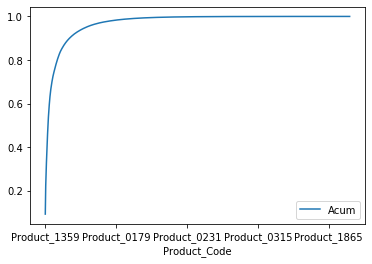

In [18]:
productos_clave2.reset_index().plot.line(x="Product_Code",y="Acum")
plt.show()

## problema 3

¿Cuál es la categoría de productos más vendedora que maneja esta empresa? ¿Cómo se ha comportado a través del tiempo?
Explora si existe estacionalidad por mes importante para la serie de tiempo de esta categoría.
Opcional: Desestacionaliza la serie de tiempo, entrena un modelo de regresión, y genera un pronóstico para el siguiente año completo.

In [19]:
producto_top= datos_limpios.iloc[:,[2,4]]
producto_top=producto_top.groupby(["Product_Category"]).sum().sort_values(by="Order_Demand",ascending=False).head(3)
producto_top= producto_top.iloc[[0]]
print(producto_top)

                  Order_Demand
Product_Category              
Category_019        4233421162


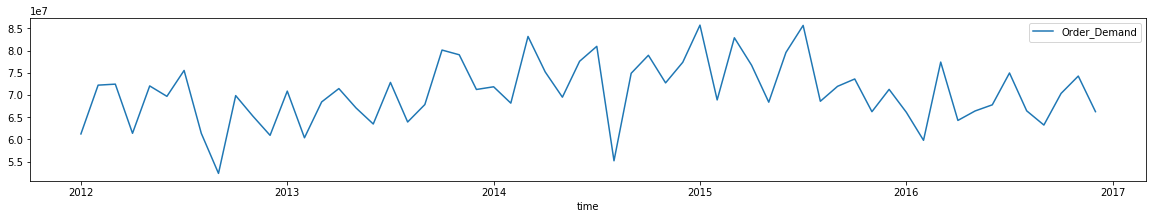

     año  mes  Order_Demand         time
0   2012    1      61243661  2012.000000
1   2012    2      72219508  2012.083333
2   2012    3      72444888  2012.166667
3   2012    4      61382420  2012.250000
4   2012    5      72041920  2012.333333
5   2012    6      69699151  2012.416667
6   2012    7      75524796  2012.500000
7   2012    8      61371824  2012.583333
8   2012    9      52363457  2012.666667
9   2012   10      69864828  2012.750000
10  2012   11      65250687  2012.833333
11  2012   12      60926157  2012.916667
12  2013    1      70877473  2013.000000
13  2013    2      60376821  2013.083333
14  2013    3      68444323  2013.166667
15  2013    4      71445203  2013.250000
16  2013    5      67082121  2013.333333
17  2013    6      63476196  2013.416667
18  2013    7      72831404  2013.500000
19  2013    8      63925164  2013.583333
20  2013    9      67850195  2013.666667
21  2013   10      80114070  2013.750000
22  2013   11      79053358  2013.833333
23  2013   12   

In [20]:
categoria19= datos_limpios.iloc[:,[2,3,4,5]]
categoria19=categoria19[categoria19["Product_Category"].isin(producto_top.index)]
categoria19["mes"]=pd.DatetimeIndex(categoria19["Date"]).month
categoria19=categoria19.groupby(["año","mes"]).sum().reset_index()
categoria19["time"]= categoria19["año"]+(categoria19["mes"]-1)/12

plt.rcParams["figure.figsize"] = (20,3)
categoria19.plot.line(x="time",y="Order_Demand")
plt.show()

print(categoria19)



        año  Order_Demand         time  promedio/promedio
mes                                                      
1    2014.0    71161853.8  2014.000000           1.008572
2    2014.0    65893295.0  2014.083333           0.933901
3    2014.0    76870538.0  2014.166667           1.089481
4    2014.0    69801816.0  2014.250000           0.989297
5    2014.0    68686392.8  2014.333333           0.973488
6    2014.0    71626266.6  2014.416667           1.015154
7    2014.0    77984769.8  2014.500000           1.105273
8    2014.0    63105746.2  2014.583333           0.894394
9    2014.0    66058583.0  2014.666667           0.936244
10   2014.0    74575661.2  2014.750000           1.056956
11   2014.0    71507568.4  2014.833333           1.013472
12   2014.0    69411741.6  2014.916667           0.983768


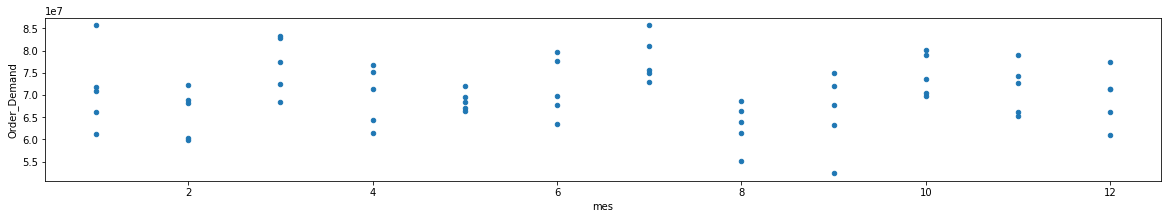

In [21]:
promedio_mes=categoria19.groupby(["mes"]).mean()
promedio_total=categoria19["Order_Demand"].mean()
promedio_mes["promedio/promedio"]= promedio_mes["Order_Demand"]/promedio_total
print(promedio_mes)

categoria19.plot.scatter(x="mes",y="Order_Demand")
plt.show()


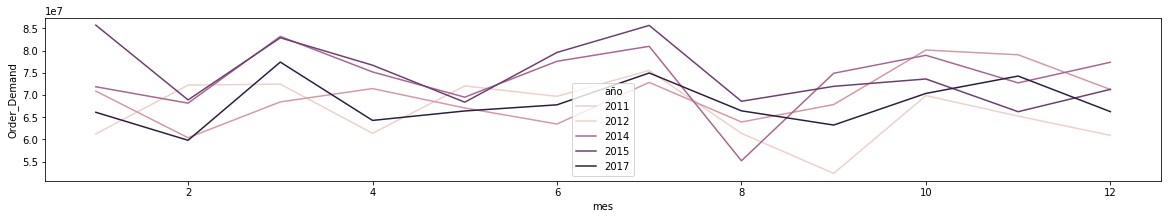

In [22]:
#sns.relplot(x="año",y="Order_Demand",col= "mes",col_wrap=2,data=categoria19)
sns.lineplot(x="mes",y="Order_Demand", hue="año", data=categoria19)
#No estacional


In [23]:
año=[]
lista_mes=[]
valores=[]

for mes in promedio_mes.index:
    cache=categoria19[categoria19["mes"]==mes]
    factor=promedio_mes["promedio/promedio"].values[mes-1]
    estacional=cache["Order_Demand"]/factor
    año.extend([2012,2013,2014,2015,2016])
    lista_mes.extend([mes,mes,mes,mes,mes])
    valores.extend(estacional)
    
print(valores)

    

[60723125.44593334, 70275055.63832563, 71240705.81588942, 84993938.27440825, 65552271.6587767, 77330982.22826977, 64650106.33623294, 72993307.7627025, 73770470.15467563, 64040230.35145245, 66494856.13892798, 62822864.89850491, 76343201.5114856, 76071570.36145629, 71052603.9229585, 62046531.808182, 72218186.58308877, 76003338.761467, 77539553.55617832, 64977486.12441723, 74003932.0372033, 68909056.32991803, 71404800.15772301, 70248846.19718185, 68218462.1113071, 68658672.02615339, 62528614.19548467, 76430942.16262376, 78387368.74871436, 66779499.70035717, 68331348.64284165, 65894491.90795103, 73243945.71808968, 77498869.08958326, 67816441.47486766, 68618362.59430298, 71473190.73085205, 61718484.246700004, 76690076.25683096, 74284983.00464727, 55929287.033822946, 72470635.99058898, 79987657.5403862, 76850301.10854584, 67547215.15998934, 66100037.77271015, 75796981.18093908, 74683661.36501852, 69639522.09249826, 66564894.42216729, 64383310.59719413, 78002502.89878452, 71761028.47291085, 6

     año  mes  Order_demand         time
0   2012    1  6.072313e+07  2012.000000
1   2013    1  7.027506e+07  2013.000000
2   2014    1  7.124071e+07  2014.000000
3   2015    1  8.499394e+07  2015.000000
4   2016    1  6.555227e+07  2016.000000
5   2012    2  7.733098e+07  2012.083333
6   2013    2  6.465011e+07  2013.083333
7   2014    2  7.299331e+07  2014.083333
8   2015    2  7.377047e+07  2015.083333
9   2016    2  6.404023e+07  2016.083333
10  2012    3  6.649486e+07  2012.166667
11  2013    3  6.282286e+07  2013.166667
12  2014    3  7.634320e+07  2014.166667
13  2015    3  7.607157e+07  2015.166667
14  2016    3  7.105260e+07  2016.166667
15  2012    4  6.204653e+07  2012.250000
16  2013    4  7.221819e+07  2013.250000
17  2014    4  7.600334e+07  2014.250000
18  2015    4  7.753955e+07  2015.250000
19  2016    4  6.497749e+07  2016.250000
20  2012    5  7.400393e+07  2012.333333
21  2013    5  6.890906e+07  2013.333333
22  2014    5  7.140480e+07  2014.333333
23  2015    5  7

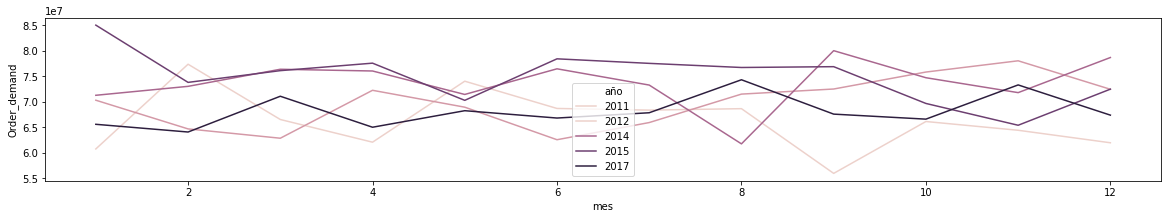

In [24]:
diccionario2= {"año":año,"mes":lista_mes,"Order_demand":valores}
lista_noestacional=pd.DataFrame(data=diccionario2)
lista_noestacional["time"]= lista_noestacional["año"]+(lista_noestacional["mes"]-1)/12
print(lista_noestacional)
sns.lineplot(x="mes",y="Order_demand", hue="año", data=lista_noestacional)

In [25]:
regresor=linear_model.LinearRegression()
x=lista_noestacional["time"].values.reshape(-1,1)
y=lista_noestacional["Order_demand"].values.reshape(-1,1)
regresor.fit(x,y)
print(regresor.intercept_)
print(regresor.coef_)
print(x)



[-1.66794946e+09]
[[863014.36411127]]
[[2012.        ]
 [2013.        ]
 [2014.        ]
 [2015.        ]
 [2016.        ]
 [2012.08333333]
 [2013.08333333]
 [2014.08333333]
 [2015.08333333]
 [2016.08333333]
 [2012.16666667]
 [2013.16666667]
 [2014.16666667]
 [2015.16666667]
 [2016.16666667]
 [2012.25      ]
 [2013.25      ]
 [2014.25      ]
 [2015.25      ]
 [2016.25      ]
 [2012.33333333]
 [2013.33333333]
 [2014.33333333]
 [2015.33333333]
 [2016.33333333]
 [2012.41666667]
 [2013.41666667]
 [2014.41666667]
 [2015.41666667]
 [2016.41666667]
 [2012.5       ]
 [2013.5       ]
 [2014.5       ]
 [2015.5       ]
 [2016.5       ]
 [2012.58333333]
 [2013.58333333]
 [2014.58333333]
 [2015.58333333]
 [2016.58333333]
 [2012.66666667]
 [2013.66666667]
 [2014.66666667]
 [2015.66666667]
 [2016.66666667]
 [2012.75      ]
 [2013.75      ]
 [2014.75      ]
 [2015.75      ]
 [2016.75      ]
 [2012.83333333]
 [2013.83333333]
 [2014.83333333]
 [2015.83333333]
 [2016.83333333]
 [2012.91666667]
 [2013.916

[68435442.38822627 69298456.75233746 70161471.11644864 71024485.48056006
 71887499.84467125 68507360.2519021  69370374.61601329 70233388.98012447
 71096403.3442359  71959417.70834708 68579278.11557817 69442292.47968936
 70305306.84380054 71168321.20791197 72031335.57202315 68651195.979254
 69514210.34336519 70377224.70747662 71240239.0715878  72103253.43569899
 68723113.84292984 69586128.20704103 70449142.57115245 71312156.93526363
 72175171.29937482 68795031.70660591 69658046.0707171  70521060.43482852
 71384074.7989397  72247089.16305089 68866949.57028174 69729963.93439317
 70592978.29850435 71455992.66261554 72319007.02672696 68938867.43395758
 69801881.798069   70664896.16218019 71527910.52629137 72390924.8904028
 69010785.29763365 69873799.66174507 70736814.02585626 71599828.38996744
 72462842.75407887 69082703.16130972 69945717.5254209  70808731.88953209
 71671746.25364351 72534760.6177547  69154621.02498555 70017635.38909674
 70880649.75320792 71743664.11731935 72606678.48143053

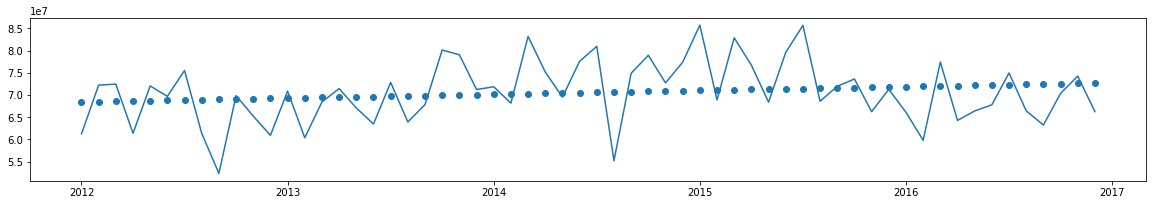

In [26]:
prediccion= regresor.predict(x)
print(prediccion.flatten())
plt.scatter(x= x.flatten(),y=prediccion.flatten())
plt.plot(categoria19["time"].values,categoria19["Order_Demand"].values)
plt.show()


In [27]:
año_nuevo=[2017 for i in range(12)]
mes_nuevo=[i+1 for i in range(12)]
print(año_nuevo)
print(mes_nuevo)

[2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


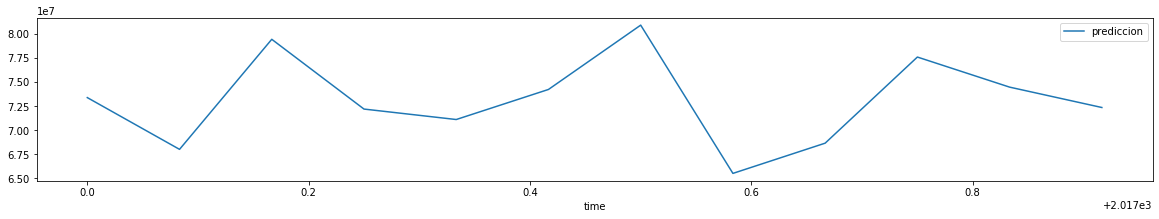

In [28]:
diccionario3={"año":año_nuevo,"mes":mes_nuevo}

prediccion_ventas= pd.DataFrame(data=diccionario3)
prediccion_ventas["time"]= prediccion_ventas["año"]+(prediccion_ventas["mes"]-1)/12
x_pred= prediccion_ventas["time"].values.reshape(-1,1)
y_pred= regresor.predict(x_pred)

prediccion_ventas.index= mes_nuevo
prediccion_ventas["desesta"]=y_pred.flatten()
prediccion_ventas["prediccion"]=prediccion_ventas["desesta"]* promedio_mes["promedio/promedio"]
prediccion_ventas.plot.line(x="time",y="prediccion")
plt.show()


## problema 4

¿Como es la distribución de Pareto de las categorías de productos en las diferentes bodegas? ¿Existe una diferencia radical entre ellas?

   Warehouse Product_Category  Order_Demand         %      acum
14    Whse_A     Category_019     106261139  0.719701  0.719701
20    Whse_A     Category_028      22912085  0.155182  0.874883
3     Whse_A     Category_006      11591923  0.078511  0.953394
4     Whse_A     Category_007       2837624  0.019219  0.972613
15    Whse_A     Category_021       1186863  0.008039  0.980652
2     Whse_A     Category_005       1124300  0.007615  0.988267
6     Whse_A     Category_009        919881  0.006230  0.994497
18    Whse_A     Category_024        154544  0.001047  0.995544
1     Whse_A     Category_003        131499  0.000891  0.996434
16    Whse_A     Category_022        102670  0.000695  0.997130
11    Whse_A     Category_015         97975  0.000664  0.997793
19    Whse_A     Category_026         85900  0.000582  0.998375
10    Whse_A     Category_013         54524  0.000369  0.998744
12    Whse_A     Category_017         47658  0.000323  0.999067
17    Whse_A     Category_023         45

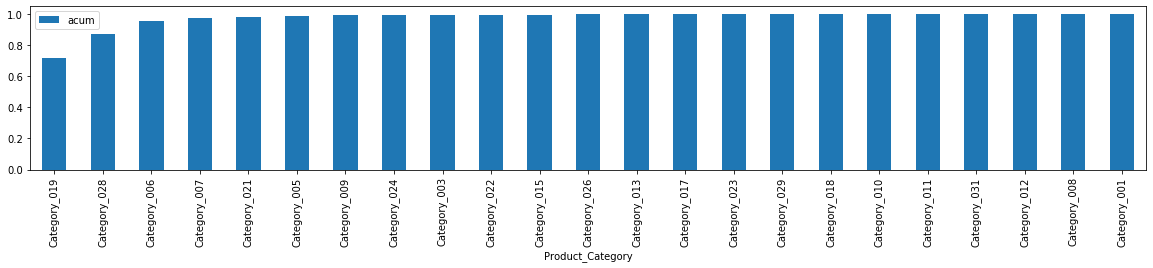

In [29]:
datos_bodega=datos_limpios.iloc[:,[1,2,4]]
datos_bodega=datos_limpios.groupby(["Warehouse","Product_Category"]).sum().reset_index()
pareto_wh=datos_bodega[datos_bodega["Warehouse"]=="Whse_A"]
pareto_wh=pareto_wh.sort_values("Order_Demand",ascending=False)

pareto_wh=pareto_wh.iloc[:,[0,1,2]]
total=pareto_wh["Order_Demand"].sum()
pareto_wh["%"] = (pareto_wh["Order_Demand"] / total)
pareto_wh["acum"]=pareto_wh["%"].cumsum()
print(pareto_wh)
pareto_wh.plot.bar(x="Product_Category",y= "acum")
plt.show()

## Problema 5

Revisa la serie de tiempo de las ventas totales de cada bodega. ¿Existe alguna variación importante en la estacionalidad de estas series de tiempo?

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


    Warehouse   año  mes    ventas         time      promedio    desviacion  \
0      Whse_A  2012    1   1920567  2012.000000  2.460772e+06  3.273462e+05   
1      Whse_A  2012    2   2552035  2012.083333  2.460772e+06  3.273462e+05   
2      Whse_A  2012    3   2362428  2012.166667  2.460772e+06  3.273462e+05   
3      Whse_A  2012    4   1981391  2012.250000  2.460772e+06  3.273462e+05   
4      Whse_A  2012    5   2723158  2012.333333  2.460772e+06  3.273462e+05   
..        ...   ...  ...       ...          ...           ...           ...   
235    Whse_S  2016    8  10725489  2016.583333  1.720870e+07  4.172349e+06   
236    Whse_S  2016    9   8160730  2016.666667  1.720870e+07  4.172349e+06   
237    Whse_S  2016   10  13912784  2016.750000  1.720870e+07  4.172349e+06   
238    Whse_S  2016   11  11661064  2016.833333  1.720870e+07  4.172349e+06   
239    Whse_S  2016   12   8421473  2016.916667  1.720870e+07  4.172349e+06   

            Z  
0   -1.650255  
1    0.278798  
2  

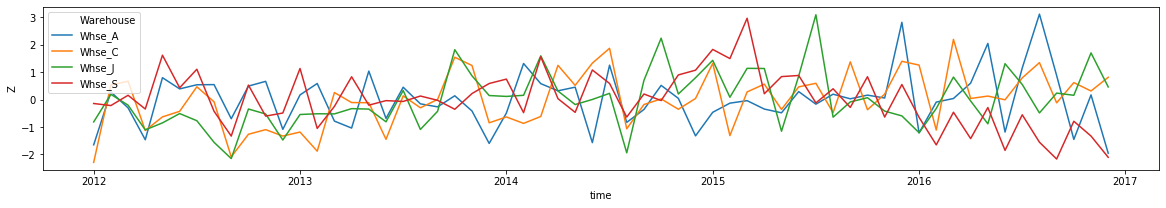

In [30]:
datos_bodega=datos_limpios.iloc[:,[1,4,5]]
datos_bodega["mes"]=pd.DatetimeIndex(datos_limpios["Date"]).month
datos_bodega=datos_bodega.groupby(["Warehouse","año","mes"]).sum().reset_index()
datos_bodega["time"]= datos_bodega["año"]+(datos_bodega["mes"]-1)/12
#print(datos_bodega)
#sns.lineplot(x="time",y="Order_Demand", hue="Warehouse", data=datos_bodega)

datos_promedio= datos_bodega.iloc[:,[0,3]].groupby(["Warehouse"]).mean().reset_index()
datos_desviacion= datos_bodega.iloc[:,[0,3]].groupby(["Warehouse"]).std().reset_index()
#print(datos_promedio)
datos_completos= datos_bodega.merge(datos_promedio,on="Warehouse")
datos_completos=datos_completos.merge(datos_desviacion, on="Warehouse")
datos_completos.columns=["Warehouse","año","mes","ventas","time","promedio","desviacion"]
datos_completos["Z"]=(datos_completos["ventas"]-datos_completos["promedio"])/datos_completos["desviacion"]
print(datos_completos)
sns.lineplot(x="time",y="Z", hue="Warehouse", data=datos_completos)


## problema 6

Considera el segundo producto más vendedor de la categoría 5. Utilizando información de los años de historia, intenta pronosticar qué tanto incrementarán las ventas para el siguiente año.

In [31]:
categoria_5=datos_limpios.iloc[:,[0,2,4]]
categoria_5=categoria_5[categoria_5["Product_Category"]=="Category_005"]
categoria_5=categoria_5.groupby("Product_Code").sum().sort_values("Order_Demand",ascending=False).head(2)
print(categoria_5)
datos_producto=datos_limpios[datos_limpios["Product_Code"]=="Product_1970"]
datos_producto["mes"]= pd.DatetimeIndex(datos_producto["Date"]).month
datos_producto=datos_producto.iloc[:,[4,5]]
datos_producto=datos_producto.groupby(["año"]).sum().reset_index()
datos_producto["atrasado"]=datos_producto["Order_Demand"].shift(1)
datos_producto["incremento"]=datos_producto["Order_Demand"]/datos_producto["atrasado"]
print(3467000*.710986)
print(3467000*.979379)
#rangos

#print(datos_producto)

              Order_Demand
Product_Code              
Product_0033      43546000
Product_1970      19034000
2464988.462
3395506.993


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## problema 7


Para cada categoría de producto, determina si, entre bodegas, existe una diferencia estadísticamente significativa en las ventas promedios del año 2014. Utiliza un nivel de significancia del 0.05.

In [32]:
datos_categoria=datos_limpios.iloc[:,[1,2,4,5]]
datos_categoria=datos_categoria[datos_categoria["año"]==2014]
datos_2014=datos_categoria.groupby(["Warehouse","Product_Category"]).mean().reset_index()
dev_std=datos_categoria.groupby(["Warehouse","Product_Category"]).std().reset_index()
conteo=datos_categoria.groupby(["Warehouse","Product_Category"]).count().reset_index()
print(conteo)

   Warehouse Product_Category  Order_Demand   año
0     Whse_A     Category_001            62    62
1     Whse_A     Category_003           308   308
2     Whse_A     Category_005           328   328
3     Whse_A     Category_006           768   768
4     Whse_A     Category_007          2843  2843
..       ...              ...           ...   ...
80    Whse_S     Category_024          1022  1022
81    Whse_S     Category_026           163   163
82    Whse_S     Category_028           418   418
83    Whse_S     Category_030          2037  2037
84    Whse_S     Category_032           782   782

[85 rows x 4 columns]


In [33]:
categoria=datos_2014["Product_Category"].unique()
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]

for valor in categoria :
    cache_prom= datos_2014[datos_2014["Product_Category"]== valor]
    cache_dev=dev_std[dev_std["Product_Category"]== valor]
    cache_count=conteo[conteo["Product_Category"]==valor]
    objeto= cache_prom.merge(cache_dev,on= "Warehouse")
    objeto= objeto.merge(cache_count, on="Warehouse")
   # print(objeto)
    warehouse=objeto["Warehouse"].unique()
    if len(warehouse)>1:
        for warehouse_a in warehouse:
            #print("Whse_1:", warehouse_a)
            for warehouse_b in warehouse :
                #print("Whse_2:",warehouse_b)
                if warehouse_a!= warehouse_b :
                    mean_a= objeto[objeto["Warehouse"]==warehouse_a]["Order_Demand_x"].values
                    desv_a=objeto[objeto["Warehouse"]==warehouse_a]["Order_Demand_y"].values
                    conteo_a=objeto[objeto["Warehouse"]==warehouse_a]["Order_Demand"].values
                    mean_b= objeto[objeto["Warehouse"]==warehouse_b]["Order_Demand_x"].values
                    desv_b=objeto[objeto["Warehouse"]==warehouse_b]["Order_Demand_y"].values
                    conteo_b=objeto[objeto["Warehouse"]==warehouse_b]["Order_Demand"].values
                    z=(mean_a-mean_b)/((desv_a)**2/conteo_a+(desv_b)**2/conteo_b)**1/2
                    lista1.append(warehouse_a)
                    lista2.append(warehouse_b)
                    lista3.append(mean_a)
                    lista4.append(mean_b)
                    lista5.append(z)
                    #print(lista2)
valorp=[vale.norm.sf(abs(valorz))*2 for valorz in lista5]
#print(valorp)
dic= {"Warehouse_a":lista1,"Warehouse_b":lista2,"promedio_A":lista3,"promedio_B":lista4,"Z":lista5,"valor_p":valorp}
comparacion= pd.DataFrame(data=dic)
print(comparacion)
    
    

    Warehouse_a Warehouse_b            promedio_A            promedio_B  \
0        Whse_A      Whse_C   [18.56451612903226]   [27.55609756097561]   
1        Whse_A      Whse_J   [18.56451612903226]   [17.55955749935683]   
2        Whse_A      Whse_S   [18.56451612903226]   [25.72977346278317]   
3        Whse_C      Whse_A   [27.55609756097561]   [18.56451612903226]   
4        Whse_C      Whse_J   [27.55609756097561]   [17.55955749935683]   
..          ...         ...                   ...                   ...   
201      Whse_C      Whse_S  [10322.933333333332]   [985.6061381074169]   
202      Whse_J      Whse_C   [65.70833333333333]  [10322.933333333332]   
203      Whse_J      Whse_S   [65.70833333333333]   [985.6061381074169]   
204      Whse_S      Whse_C   [985.6061381074169]  [10322.933333333332]   
205      Whse_S      Whse_J   [985.6061381074169]   [65.70833333333333]   

                            Z                valor_p  
0       [-0.3444023472904556]   [0.730543723


## problema extra

utilizando regresion lineal, detecta cuales son los productos que, desde el 2015, trae un tendencia a la baja?

In [65]:
datos_2015= datos_limpios.iloc[:,[0,3,4,5]]
datos_2015["mes"]=pd.DatetimeIndex(datos_2015["Date"]).month
datos_2015=datos_2015.groupby(["año","mes","Product_Code"]).sum().reset_index()
datos_2015=datos_2015[datos_2015["año"]>=2015]
datos_2015["tiempo"]=datos_2015["año"]+(datos_2015["mes"]-1)/12
print(datos_2015)





    

         año  mes  Product_Code  Order_Demand       tiempo
61424   2015    1  Product_0001          3500  2015.000000
61425   2015    1  Product_0002        653500  2015.000000
61426   2015    1  Product_0003          3800  2015.000000
61427   2015    1  Product_0004          2900  2015.000000
61428   2015    1  Product_0005           200  2015.000000
...      ...  ...           ...           ...          ...
105214  2016   12  Product_2167          4852  2016.916667
105215  2016   12  Product_2168           822  2016.916667
105216  2016   12  Product_2169            96  2016.916667
105217  2016   12  Product_2170            27  2016.916667
105218  2016   12  Product_2171            49  2016.916667

[43795 rows x 5 columns]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [136]:
lista_producto=[]
lista_pendiente=[]
lista_datos=[]
lista_productos=datos_2015["Product_Code"].unique()
for producto in lista_productos :
    regresion=linear_model.LinearRegression()
    datos_producto= datos_2015[datos_2015["Product_Code"]==producto]
    x=datos_producto["tiempo"].values.reshape(-1,1)
    y=datos_producto["Order_Demand"].values.reshape(-1,1)
    regresion.fit(x,y)
    lista_pendiente.append(regresion.coef_.tolist()[0][0])
    lista_producto.append(producto)
    lista_datos.append(datos_producto.shape[0])
    


In [137]:
print(len(lista_pendiente))
print(len(lista_producto))
print(len(lista_datos))

tendencia_prod=pd.DataFrame({"producto":lista_producto,"pendiente":lista_pendiente,"datos":lista_datos})
print(tendencia_prod)

2148
2148
2148
          producto      pendiente  datos
0     Product_0001    -368.347826     24
1     Product_0002 -163578.260870     24
2     Product_0003   -1161.913043     24
3     Product_0004    -587.478261     24
4     Product_0005     483.884892     16
...            ...            ...    ...
2143  Product_0465       0.000000      1
2144  Product_1013   66600.000000      5
2145  Product_1698       0.000000      1
2146  Product_1019     480.000000      2
2147  Product_0853       0.000000      1

[2148 rows x 3 columns]


[   -368.34782609 -163578.26086956   -1161.91304348 ...       0.
     480.               0.        ]


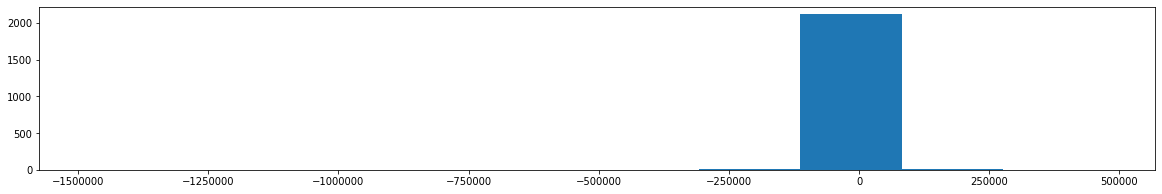

In [140]:
plt.hist(x=tendencia_prod["pendiente"])
print(tendencia_prod["pendiente"].values)
